# Lecture 3

# The story so far

* Transform a system of polynomial equations $f_i(x) = 0$ to a *lower diagonal* one, where $f_i$ only depends on $x_1, \ldots, x_i$.
* Solve $f_1(x_1) = 0$, substitute and solve $f_2(x_1^*, x_2)$, etc.

Today, we focus on the canonical task of scalar root-finding, and the numerical issues that may arise when using it to solve the system of equations by substitution.

# Contents

* Scalar root-finding
* Finding multiple roots
* Computing with finite accuracy
* The (in)stability of Gaussian elimination


# Scalar root-finding

> Assuming (for the moment) that $f : \mathbb{R} \rightarrow \mathbb{R}$ has at least one real root, how do we find it?

* bisection
* Fixed-point iteration
* Newton's method

## Bi-section

* Start with $x_0, x_1$ such that $f(x_0)f(x_1) < 0$
* pick $x_2 = (x_0 + x_1) / 2$ and check on which interval the sign changes
* repeat

In [1]:
# copied from: https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/

def bisection(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    x_N : number
        The midpoint of the Nth interval computed by the bisection method. The
        initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0 for some
        midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iteration, the bisection method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> bisection(f,1,2,25)
    1.618033990263939
    >>> f = lambda x: (2*x - 1)*(x - 3)
    >>> bisection(f,0,1,10)
    0.5
    '''
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2

In [2]:
f = lambda x: x*(x-1)

root = bisection(f,.5,2,100)    

print('root  = ', root)
print('error = ', abs(root - 1))

Found exact solution.
root  =  1.0
error =  0.0


* Method only works when $f$ changes sign at the root
* Method converges lineary

## Fixed-point iteration

* Express $f(x) = 0$ as $g(x) = x$
* Apply *fixed-point iteration* $x_{k+1} = g(x_k)$.

In [30]:
g = lambda x : x**2
x = 2

for k in range(10):
    x = g(x)
    print('error = ', abs(x - 1))

error =  3
error =  15
error =  255
error =  65535
error =  4294967295
error =  18446744073709551615
error =  340282366920938463463374607431768211455
error =  115792089237316195423570985008687907853269984665640564039457584007913129639935
error =  13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084095
error =  179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137215


* Requires clever choice of $g$
* Some choices are better than others
* Method converges *at least* lineary, sometimes faster

## Newton's method

Construct $g$ such that $g'(x^*) = 0$:

$$g(x) = x - f(x)/f'(x).$$

* What happens when $f'(x^*) = 0$?

In [8]:
def newton(f,Df,x0,max_iter,epsilon=1e-16):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> Df = lambda x: 2*x - 1
    >>> newton(f,Df,1,1e-8,10)
    Found solution after 5 iterations.
    1.618033988749989
    '''
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None

In [37]:
f  = lambda x: x*(x-1)
df = lambda x: 2*x-1

root = newton(f,df,2,100)    

print('root  = ', root)
print('error = ', abs(root - 1))

Found solution after 6 iterations.
root  =  1.0
error =  0.0


* Quadratic convergence if $f'(x_*)\not = 0$, linear convergence otherwise
* Need to start sufficiently close to a root

## Basin of attraction

* The *basin of attraction* of a root consists of all points $x_0$ for which Newton's method converges to that root.

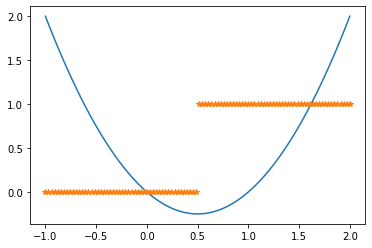

In [45]:
import numpy as np
import matplotlib.pyplot as plt

f  = lambda x: x*(x-1)
df = lambda x: 2*x-1

x0 = np.linspace(-1,2,100)
x = np.copy(x0)

for k in range(10):
    x = x - f(x) / df(x)

plt.plot(x0,f(x0))
plt.plot(x0,x,'*')

## Complex roots

* Newton's method also works for complex roots

In [67]:
f  = lambda x: x**2 + 1
df = lambda x: 2*x

root = newton(f,df,2 + 1j,100) 
print(root)

Found solution after 7 iterations.
1j


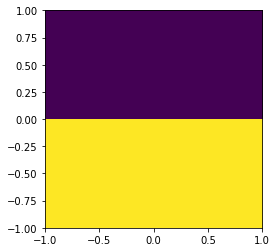

In [65]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)

xx, yy = np.meshgrid(x,y)
zz = xx + 1j*yy

f  = lambda x: x**2 + 1
df = lambda x: 2*x

for k in range(20):
    zz = zz - f(zz) / df(zz)
    
plt.imshow(np.angle(zz),extent=(-1,1,-1,1))

# Finding multiple roots

> Often, there will be multipe roots, how do we find them all?

## Horner's method

* A simple idea is to use Newton to find a root; divide it out, and continue.
* To this, we need to implement polynomial division

### An example

Divide $x^{3}-6x^{2}+11x-6$ by $x-2$:

|.  |.|.|.|.|
|-------|-----|-----|-----|-----|
| 2     | 1   |  -6 | 11  | -6  |
|       | 0   |  2   |-8    |6    |
|       | 1   | -4  |3    |0    |

This yields

$$x^2 - 4x + 3.$$

In [31]:
import numpy as np
def horner(a, x0):
    """
    Horner's method for polynomial evaluation and division
    
    input:
        c - array of length n+1 with coefficients: f = a[0] + a[1]x + a[2]x^2 + ...
        x0 - point of evaluation
    output:
        b[0] - f(x0)
        b[1:] - array of coefficients 
    """
    
    n = len(a) - 1
    b = np.zeros(n+1)
    b[n] = a[n]
    for i in range(n,0,-1):
        b[i-1] = a[i-1] + b[i]*x0
    return b[0],b[1:]

def diff(a):
    """
    differentiate polynomial
    """
    
    n = len(a) - 1
    b = np.zeros(n)
    for i in range(n):
        b[i] = (i+1)*a[i+1]
    return b

def root(a,x,epsilon=1e-6,niter=10):
    """
    Newton's method for rootfinding of a polynomial
    """
    it = 0
    done = False
    
    while not done:
        f,_  = horner(a,x)
        df,_ = horner(diff(a),x)
        
        x -= f / df   
        done = (np.abs(f) <= epsilon) or (it > niter)
    return x

In [41]:
a = [-1,0,1] #x^2 -1
roots = np.zeros(len(a)-1)

for i in range(len(a)-1):
    roots[i] = root(a,2)
    a0,a = horner(a,x0)

print(roots)

[ 1. -1.]


### Why does it work?

Given

$$f(x) = \sum_{i=0}^n a_i x^{i},$$

define

$$b_{i-1} = a_{i-1} + b_i x_0, \quad b_n - a_n.$$

It can be shown that

$$f(x) = \left(\sum_{i=1}^n b_{i}x^{i-1}\right)(x-x_0) + b_0.$$

## The companion matrix

Alternatively, we can construct a matrix whose eigenvalues are exactly the roots of the polynomial.

For 

$$f(x) = \sum_{i=0}^n a_i x^{i},$$

with $a_n = 1$, we define the *companion matrix* by 

$$C[f] = \left(\begin{matrix} 0 & 0 & \ldots &0 & -a_0 \\ 1 & 0 & \ldots & 0 & -a_1 \\ 0 & 1 & \ldots &0 & -a_2 \\ 0 & 0 & \ddots &0& -a_3 \\ \vdots & & & & \vdots\\ 0 & 0 & \ldots  & 1 & -a_{n-1}\end{matrix}\right).$$

In [59]:
def companion(a):
    """
    Generate companion matrix for given polynomial
    """
    
    n = len(a) - 1
    C = np.diag(np.ones(n-1),-1)
    C[:,-1] = -np.array(a[0:-1])/a[n]
    
    return C

In [60]:
a = [-2,0,2]
C = companion(a)

print(C)

[[0. 1.]
 [1. 0.]]


## Finding the eigenvalues of a matrix

In [61]:
a = [-2,0,2]
C = companion(a)

print(np.linalg.eigvals(C))

[ 1. -1.]


# Computing in finite accuracy

> We cannot compute in $\mathbb{R}$, so what do we do?

# Floating point arithemetic

The floating point representation of a number $x \in \mathbb{R}$ has the form

$$\text{fl}(x) = \pm\sum_{k=1}^n d_k \beta^{e - k},$$

with 

* $\beta \in \mathbb{Z}$, the base
* $U \leq e \leq U \in \mathbb{Z}$, the exponent
* $d_k \in \{0, \ldots, \beta-1\}$ the digits

Any real number $\beta^{L-1} \leq x \leq \beta^{U}(1 - \beta^{-n})$ can be represented with error

$$\frac{|x - \text{fl}(x)|}{|x|} \leq \frac{1}{2}\beta^{-n} \equiv \eta.$$


This implies that $\exists \epsilon$ with $|\epsilon| \leq \eta$

$$\text{fl}(x) = x(1 + \epsilon)$$

Special values are reserved for 

* small numbers; `0`
* large numbers; `Inf`
* undefined computations; `NaN`

Elementary operations $\circ \in \{+, -, *, /\}$ preserve accuracy:

$$\text{fl}( \text{fl}(x) \circ \text{fl}(y) ) = ( \text{fl}(x) \circ \text{fl}(y) ) ( 1 + \epsilon).$$

**However, the order of the operations matter!!**

In [77]:
# partial sum of (pi k)^3

def sum(a):
    s = a[0]
    n = len(a)
    for k in range(1,n):
        s += a[k]
    return s

n = 1000
a = [(np.pi*k)**3 for k in range(1,n+1)]
S = (np.pi**3)*(n*(n+1)/2)**2
S1 = sum(a)

print('error = ', abs(S-S1))

error =  0.0029296875


In [70]:
# has roots x0 = −200.0000000000000075… and x1 = 0.0000000000000075
a = 1
b = 200
c = -0.0000000000015

x0 = (-b + np.sqrt(b**2 - 4*a*c))/2
x1 = (-b - np.sqrt(b**2 - 4*a*c))/2

print('x_0 = % 1.20e' % x0)
print('x_1 = % 1.20e' % x1)

x_0 =  1.42108547152020037174e-14
x_1 = -2.00000000000000000000e+02


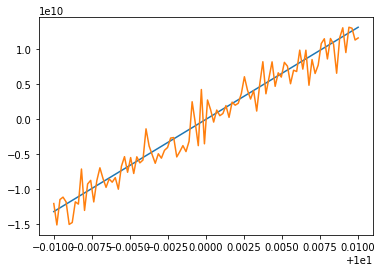

In [81]:
# 
def f1(x):
    y = 0*x + 1
    for k in range(1,21):
        y = y*(x - k)
    return y

def f2(x):
    return x**20 - 210*x**19 + 20615*x**18 - 1256850*x**17 + 53327946*x**16 - 1672280820*x**15 + 40171771630*x**14 - 756111184500*x**13 + 11310276995381*x**12 - 135585182899530*x**11 + 1307535010540395*x**10 - 10142299865511450*x**9 + 63030812099294896*x**8 - 311333643161390640*x**7 + 1206647803780373360*x**6 - 3599979517947607200*x**5 + 8037811822645051776*x**4 - 12870931245150988800*x**3 + 13803759753640704000*x**2 - 8752948036761600000*x + 2432902008176640000
#
x0 = 10
delta = 1e-2
x = np.linspace(x0-delta,x0+delta,100)

plt.plot(x,f1(x),x,f2(x))

## Error analysis of the fixed-point iteration

Assuming we can evaluate $g$ with relative accuracy $\eta$, the fixed point iteration becomes

$$\widetilde{x}_{k+1} = g(\widetilde{x}_k)(1 + \epsilon).$$

The error $e_k = \widetilde{x}_k - x_k$ then obeys (assuming $|g| \leq M$ and $|g'| \leq L < 1$)

$$|e_{k+1}| \leq L |e_k| + \eta M.$$

We then find

$$|e_{k}| \leq \left(\right) |e_0|.$$

# The (in)stability of Gaussian elimination

> How do round-off errors propagate through Gaussian elimination?

## An example

We want to solve $Ax = b$ with $b = (2,1,0, -1, -2, \ldots, -n+2)$ and  

$$A = \left(\begin{matrix} 1 & 0 & \ldots & \ldots & 0 & 1 \\ -1 & 1 & 0 & \ldots & 0 & 1 \\ -1 & -1 & 1 & \ddots & \vdots & 1 \\ \vdots & \ddots & -1 & \ddots & 0 & \vdots \\ \vdots & \ddots & \ddots & \ddots & \ddots & 1 \\ -1 & \ldots & \ldots & \ldots & -1 & 1\end{matrix}\right).$$ 

The solution is $x = (1,1,\ldots, 1)$.

In [78]:
N = [20, 40, 60, 80, 100]
residual = []
error = []

for n in N:
    A = np.eye(n) - np.tril(np.ones((n,n)),-1)
    A[:,-1] = 1
    x = np.ones(n)
    b = A@x
    xh = np.linalg.solve(A, b)
    residual.append(np.linalg.norm(A@xh - b)/np.linalg.norm(b))
    error.append(np.linalg.norm(x - xh)/np.linalg.norm(x))
   
print('N   | Residual | Error    |')
print('-- -|----------|----------|')
for i in range(len(N)):
    print('%3d | %1.2e | %1.2e |'%(N[i], residual[i], error[i]))

N   | Residual | Error    |
-- -|----------|----------|
 20 | 0.00e+00 | 0.00e+00 |
 40 | 0.00e+00 | 0.00e+00 |
 60 | 3.25e-02 | 3.16e-01 |
 80 | 1.89e-01 | 5.70e-01 |
100 | 3.19e-01 | 6.78e-01 |


## Gaussian elimination is unstable!

To understand what is happening, let's try it by hand.

# Summary

We can implement the suggested elimination procedure using numerical rootfinding for small problems, however

* working with higher-order polynomials may be numerically unstable
* rounding errors may grow exponentially in an elimination-procedure